In [1]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import glob

# Defining the model #

First we set up the parameters of the model. Below we set the size of the Hilbert space to include 30 atomic levels. Then we define the atom annihilation operator b. Next we define:

$\chi=220$MHz

$\kappa=311$MHz

$\epsilon_1=89$MHz

$\epsilon_2=1.244$GHz

$\epsilon_{\textsf{eff}}=-\epsilon_1 - i \epsilon_2$

$\delta=-1.825$GHz


Then we define the Hamiltonian:

$H = H_{\textsf{atom}} + H_{\textsf{pump}}$

where

$H_{\textsf{atom}} = \delta b^\dagger b + \chi b^\dagger b^\dagger b \, b$

$ H_{\textsf{pump}} = \epsilon_{\textsf{eff}} b^\dagger + \epsilon_{\textsf{eff}}^* b$


Now we define a list of Lindblad operators. In thise case we have just one:

$L = \sqrt{2 \kappa} b$

In [3]:
loaded = qload('output_72')
times = loaded[1]
kappa_a = 0.5*loaded[0].kappa

i_signal = np.array([point.real for point in loaded[2][0]])
q_signal = np.array([point.imag for point in loaded[2][0]])

N = 1
i_smooth = np.convolve(i_signal, np.ones((N,))/N, mode='valid')
q_smooth = np.convolve(q_signal, np.ones((N,))/N, mode='valid')
times_smooth = np.convolve(times, np.ones((N,))/N, mode='valid')

Loaded list object.


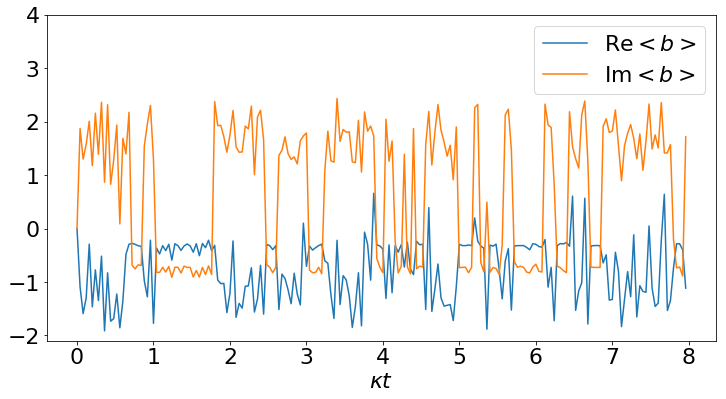

In [4]:
import matplotlib

plt.rcParams['figure.figsize'] = (12,6)

font = {'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, axes = plt.subplots(1,1)

n = 200
axes.plot(kappa_a*times_smooth[:n], i_smooth[:n])
axes.plot(kappa_a*times_smooth[:n], q_smooth[:n])
axes.set_xlabel(r'$\kappa t$')
#axes.set_ylabel(r'Im$<b>$')
axes.legend([r'Re$<b>$', r'Im$<b>$'], loc=1)
axes.set_ylim([-2.1,4.0])

plt.savefig('switching.png')

## Figure 1: Real and imaginary parts of $<b>$ for a Quantum jump trajectory ##

Cluster centers:
[-0.37497983 -0.71313552]
[-1.06006642  1.65240668]


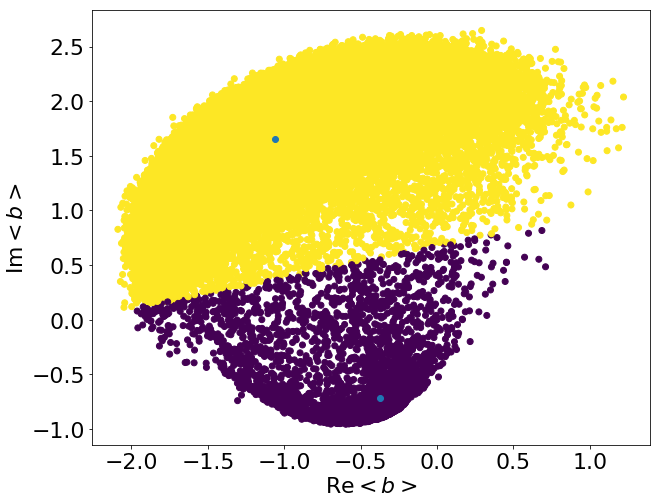

In [7]:
X = np.vstack([i_smooth, q_smooth]).T
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
colours = kmeans.predict(X)

fig, axes = plt.subplots(1,1,figsize=(10,8))

axes.scatter(X[:,0],X[:,1],c=colours)
axes.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])
axes.set_xlabel(r'Re$<b>$')
axes.set_ylabel(r'Im$<b>$')

print('Cluster centers:')
print(kmeans.cluster_centers_[0,:])
print(kmeans.cluster_centers_[1,:])

## Figure 2: Scatter plot of all the real and imaginary parts of $<b>$ at 100,001 points throughout at quantum jump trajectory. The data cluster around two centers at $\alpha_{dim} = -0.37497983 -0.71313552i$ and $\alpha_{bright} = -1.06006642 + 1.65240668i$ ##